In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix, symbols, log, simplify

# **Carlos Emiliano Mendoza Hernández**

1. Respecto a la *Agenda Nacional Mexicana de Inteligencia Artificial*, elige alguna sección y contrasta las concluisones mencionadas con el estado actual de desarrollo en esa área.

2. Respecto al artículo *Computing machinery and intelligence* de Alan Turing, selcciona alguna de las visiones opuestas a la pregunta principal que no sea *The Teological Objection* y:

    a) descríbela brevemente

    b) argumenta si estás a favor o en contra de la misma

3. Selecciona las dos características más importantes para el conjunto de datos *Iris* y con ellas obtén las funciones discriminantes de:

    a) Un clasificador determinista *a priori*

    b) Un clasificador estadístico *a priori*

In [2]:
# Load iris dataset
from sklearn import datasets
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

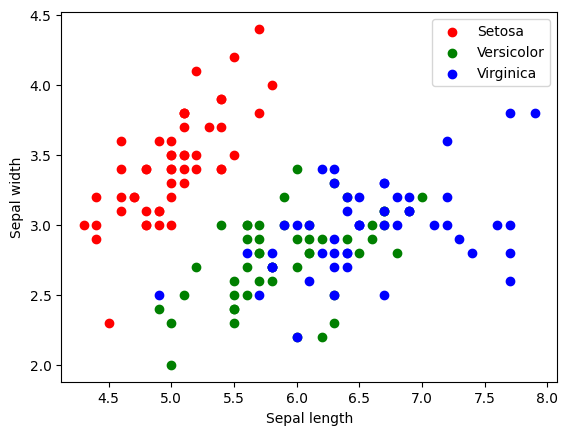

In [3]:
# Deciding the features and target plotting the data
# Plot sepal length vs sepal width
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='r', label='Setosa')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='g', label='Versicolor')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color='b', label='Virginica')
plt.legend()
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

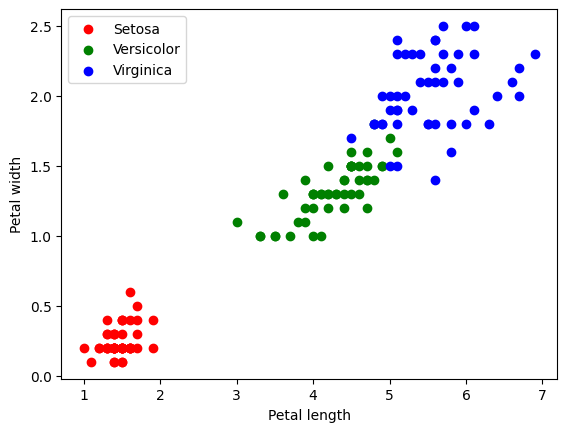

In [4]:
# Plotting petal length vs petal width
X = iris.data[:, 2:]  # we only take the last two features.
y = iris.target
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='r', label='Setosa')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='g', label='Versicolor')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color='b', label='Virginica')
plt.legend()
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

Parece haber mejor separabilidad tomando las características `petal_lenght` y `petal_width`, por lo tanto elegimos estas dos características para obtener las funciones discriminantes.

Clasificador euclideano determinista a priori

In [5]:
def clasif_e(samples):
    X = Matrix([symbols('x' + str(i+1)) for i in range(samples[0].shape[0])])
    print(' Variables : ', X)
    fds = []
    for s in samples:
        m = Matrix(np.mean(s, axis=1))
        fds.append(simplify(X.T*m - (m.T*m)/2))
    return fds

In [6]:
# We will use the first 75 samples for omega 1 and the last 75 samples for omega 2
# First 75 
omega1 = X[:75].T
# Last 75
omega2 = X[75:].T
samples = (omega1, omega2)
fds = clasif_e(samples)
print(' Discriminant Functions : ', fds)

 Variables :  Matrix([[x1], [x2]])
 Discriminant Functions :  [Matrix([[2.412*x1 + 0.612*x2 - 3.096144]]), Matrix([[5.104*x1 + 1.78666666666667*x2 - 14.6214968888889]])]


In [7]:
print('\n Discriminant Functions')
display(fds[0])
display(fds[1])


 Discriminant Functions


Matrix([[2.412*x1 + 0.612*x2 - 3.096144]])

Matrix([[5.104*x1 + 1.78666666666667*x2 - 14.6214968888889]])

Clasificador con distancia de Mahalanobis

In [8]:
def clasif_m(samples):
    X = Matrix([symbols('x' + str(i+1)) for i in range(samples[0].shape[0])])
    print('Variables: ', X)
    fds = []
    for s in samples:
        m = Matrix(np.mean(s, axis=1))
        m_cov = np.cov(s, bias=True)
        m_ci = Matrix(m_cov).inv()
        fds.append(simplify((X.T*m_ci*X)/-2 + X.T*m_ci*m - (m.T*m_ci*m)/2 - Matrix([log(m_ci.det())/2])))
    return fds

In [9]:
fds = clasif_m(samples)
print(' Discriminant Functions : ', fds)

Variables:  Matrix([[x1], [x2]])
 Discriminant Functions :  [Matrix([[-5.35558536346246*x1**2 + 26.6993951120122*x1*x2 + 9.49531398479144*x1 - 35.0077330321861*x2**2 - 21.5494757787777*x2 - 6.66388157592424]]), Matrix([[-1.95802115789614*x1**2 + 6.08939623090109*x1*x2 + 9.10775871392715*x1 - 7.58256829486591*x2**2 - 3.98523432219833*x2 - 21.2352982071676]])]


In [10]:
print('\n Discriminant Functions')
display(fds[0])
display(fds[1])


 Discriminant Functions


Matrix([[-5.35558536346246*x1**2 + 26.6993951120122*x1*x2 + 9.49531398479144*x1 - 35.0077330321861*x2**2 - 21.5494757787777*x2 - 6.66388157592424]])

Matrix([[-1.95802115789614*x1**2 + 6.08939623090109*x1*x2 + 9.10775871392715*x1 - 7.58256829486591*x2**2 - 3.98523432219833*x2 - 21.2352982071676]])

4. Para el conjunto de datos de vinos:

    a) Aplica regresión logística al conjunto completo reducido

    b) Con ayuda de PCA, determina el número de componentes que conservan el 80% de la información y realiza la reducción a ese número de componentes.

    c) Aplica la regresión logística al conjunto reducido con PCA y evalúa su rendimiento

    d) Reduce al mismo número de componentes con ayuda de LDA

    e) Aplica la regresión logística al conjunto reducido con LDA y evalúa su rendimiento

In [11]:
# Wines dataset
wines = datasets.load_wine()
wines

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [12]:
# Training and testing data
from sklearn.model_selection import train_test_split
X = wines.data
y = wines.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [14]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class='auto')
lr.fit(X_train_std, y_train)

C:\Users\denis\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='auto', solver='liblinear')

In [15]:
# Predictions and evaluation
y_pred = lr.predict(X_test_std)
from sklearn.metrics import accuracy_score
acc_lr = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc_lr:.5f}')

Accuracy: 0.98148


In [16]:
# PCA
from sklearn.decomposition import PCA
pca = PCA()

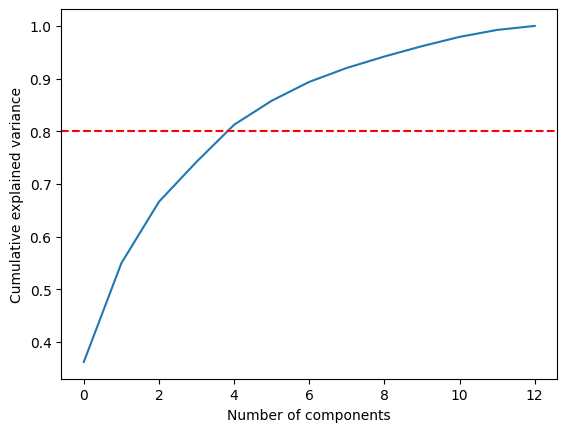

Number of components:  5


In [17]:
# Determine the number of components
pca.fit(X_train_std)
# Add 0 to the beginning of the array
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
cumulative_variance = pca.explained_variance_ratio_.cumsum()
n_components = (cumulative_variance < 0.80).sum() +1
plt.axhline(y=0.80, color='r', linestyle='--')
plt.show()
print('Number of components: ', n_components)

En la gráfica vemos que el número de componentes es 5 para tener una información del 80% (Pareciera que fuera 4, pero la gráfica empieza desde 0 en el eje de los componentes)

In [18]:
# Using 5 components
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [19]:
# Logistic regression
lr_pca = LogisticRegression(solver='liblinear', multi_class='auto')
lr_pca.fit(X_train_pca, y_train)

C:\Users\denis\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='auto', solver='liblinear')

In [20]:
# Predictions and evaluation
y_pred_pca = lr_pca.predict(X_test_pca)
acc_lr_pca = accuracy_score(y_test, y_pred_pca)
print(f'Accuracy: {acc_lr_pca:.5f}')

Accuracy: 0.98148


In [21]:
y_train # We have 3 classes

array([2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 2, 1, 0, 2, 1,
       0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2,
       2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 2, 2, 0, 0, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1])

Dado que LDA utiliza la matriz de dispersión entre clases, el número de componentes está limitado por el número de clases que tengamos. En este caso tenemos 3 clases, por lo que el máximo de `n_componentes` que podemos usar para esta instancia de LDA es 2.

In [22]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2) ###################
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

In [23]:
# Logistic regression
lr_lda = LogisticRegression(solver='liblinear', multi_class='auto')
lr_lda.fit(X_train_lda, y_train)

C:\Users\denis\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='auto', solver='liblinear')

In [24]:
# Predictions and evaluation
y_pred_lda = lr_lda.predict(X_test_lda)
acc_lr_lda = accuracy_score(y_test, y_pred_lda)
print(f'Accuracy: {acc_lr_lda:.5f}')

Accuracy: 0.98148


In [25]:
# Comparison
print(f'Accuracy (LR): {acc_lr:.8f}')
print(f'Accuracy (LR PCA): {acc_lr_pca:.8f}')
print(f'Accuracy (LR LDA): {acc_lr_lda:.8f}')

Accuracy (LR): 0.98148148
Accuracy (LR PCA): 0.98148148
Accuracy (LR LDA): 0.98148148


5. Para la implementación

6. Elige:

    a) Matriz de covarianzas

    b) Matriz de dispersión

Y escribe un código que la obtenga *desde cero*

In [26]:
# Covariance matrix
def cov_matrix(X: np.ndarray, bias: bool = False) -> np.ndarray:
    """ 
    Compute the covariance matrix of a dataset. Rows are the samples and columns are the features.
    
    Parameters
    ----------
    X : np.ndarray
        Dataset with shape (n, m) where n is the number of samples and m the number of features.
    bias : bool, optional
        If True, normalize by n and not by n-1, by default False.
    Returns
    -------
    np.ndarray
        Covariance matrix of the dataset.
    """
    mean_X = np.mean(X, axis=0)
    X_centered = X - mean_X
    n = X.shape[0]
    return np.dot(X_centered.T, X_centered) / (n - 1) if not bias else np.dot(X_centered.T, X_centered) / n

In [27]:
# Test
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
cov_matrix(A)

array([[9., 9., 9.],
       [9., 9., 9.],
       [9., 9., 9.]])

In [28]:
# Covariance matrix numpy
np.cov(A, rowvar=False)

array([[9., 9., 9.],
       [9., 9., 9.],
       [9., 9., 9.]])

In [29]:
# More test cases
A = np.array([[1, 2], [2, 4], [3, 6]])
cov_matrix(A)

array([[1., 2.],
       [2., 4.]])

In [30]:
np.cov(A, rowvar=False)

array([[1., 2.],
       [2., 4.]])

In [31]:
A = np.array([[12, 6, 3], [7, 5, 6], [10, 8, 3]])
cov_matrix(A)

array([[ 6.33333333,  1.66666667, -4.        ],
       [ 1.66666667,  2.33333333, -2.        ],
       [-4.        , -2.        ,  3.        ]])

In [32]:
np.cov(A, rowvar=False)

array([[ 6.33333333,  1.66666667, -4.        ],
       [ 1.66666667,  2.33333333, -2.        ],
       [-4.        , -2.        ,  3.        ]])

7. Implementa desde cero ***KernelPCA*** con la siguiente función de *kernel*: 
$$k(x^{(i)},x^{(j)}) = \alpha + \sum_{l=1}^n(x^{(i)},x^{(j)})^l$$

8. Escribe un código que obtenga la matriz de momentos aumentada a partir de un conjunto de vectores de datos:

$$\mathbf{A}_{(p+1)\times(p+1)}=\sum\mathbf{w}_i\mathbf{w}_i^T=\begin{bmatrix}
n & \sum x_{i,1} & \sum x_{i,2} & \cdots & \sum x_{i,p} \\
\sum x_{i,1} & \sum x_{i,1}^2 & \sum x_{i,1}x_{i,2} & \cdots & \sum x_{i,1} x_{i,p} \\
\sum x_{i,2} & \sum x_{i,2}x_{i,1} & \sum x_{i,2}^2 & \cdots & \sum x_{i,2}x_{i,p} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\sum x_{i,p} & \sum x_{i,p}x_{i,1} & \sum x_{i,p}x_{i,2} & \cdots & \sum x_{i,p}^2 \\
\end{bmatrix}$$

In [33]:
def augmented_moment_matrix(X: np.ndarray) -> np.ndarray:
    """
    Computes the augmented moment matrix of a dataset X.
    
    Parameters
    ----------
    X : numpy.ndarray
        A 2D numpy array where the rows are the samples and the columns are the features.
    
    Returns
    -------
    numpy.ndarray
        The moments matrix of X.
    """
    num_features = X.shape[1]
    A = np.zeros((num_features+1, num_features+1))
    w = np.insert(X, 0, 1, axis=1)
    for i in range(X.shape[0]):
        A += w[i].reshape(-1,1) @ w[i].reshape(1,-1)
    return A

In [34]:
# Test
A = np.array([[1, 2], [2, 4], [3, 6]])
augmented_moment_matrix(A)

array([[ 3.,  6., 12.],
       [ 6., 14., 28.],
       [12., 28., 56.]])

In [35]:
# More test cases
A = np.array([[12, 6, 3], [7, 5, 6], [10, 8, 3]])
augmented_moment_matrix(A)

array([[  3.,  29.,  19.,  12.],
       [ 29., 293., 187., 108.],
       [ 19., 187., 125.,  72.],
       [ 12., 108.,  72.,  54.]])

In [36]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
augmented_moment_matrix(A)

array([[  3.,  12.,  15.,  18.],
       [ 12.,  66.,  78.,  90.],
       [ 15.,  78.,  93., 108.],
       [ 18.,  90., 108., 126.]])

9. Elige dos estimadores

10. Obtén las expresiones para determinar los intervalos contenedores para histogramas bidimensionales en función del número de contenedores.

In [37]:
def histograma_2d(D: np.ndarray, bins: int) -> np.ndarray:
    """
    Computes the histogram of a dataset X.

    Parameters
    ----------
    D : numpy.ndarray
        A 1D numpy array where the samples are.
    bins : int
        The number of bins to use in the histogram.
    
    Returns
    -------
    numpy.ndarray
        The histogram of X.
    """
    max_val = np.max(D)
    min_val = np.min(D)
    w = (max_val - min_val) / bins
    B = np.zeros(bins+1)
    B[0] = min_val
    for i in range(1, bins):
        B[i] = B[i-1] + w
    B[bins] = max_val
    C = {(round(float(B[i]), 4), round(float(B[i+1]), 4)): 0 for i in range(bins)}
    for d in D:
        for i in range(bins):
            if B[i] < d <= B[i+1]:
                C[(round(float(B[i]), 4), round(float(B[i+1]), 4))] += 1
    return C

In [38]:
# Test
D = np.random.randint(1, 100, 100)
D

array([ 9, 43,  5, 19, 17, 38, 50, 55, 32, 18, 27, 84, 77, 84, 35, 41, 70,
       48, 94, 75, 30, 92, 72, 82, 67, 53,  3, 14, 13, 95, 16, 34, 21, 69,
       83, 43, 86, 40, 49, 24, 70, 85, 34, 96, 87, 70, 76, 45, 56, 58, 86,
       68, 21,  8, 55, 31, 31, 19, 95, 87, 21, 13, 48,  4, 80, 95,  5, 64,
        7, 69, 51, 41, 86, 11,  9, 18, 45, 51, 93, 40, 85, 24, 42, 19, 13,
       17, 79, 24, 15, 11, 12, 42, 39, 89, 22, 51, 61, 71, 54, 77],
      dtype=int32)

In [39]:
histograma_2d(D, 10)

{(3.0, 12.3): 10,
 (12.3, 21.6): 16,
 (21.6, 30.9): 6,
 (30.9, 40.2): 10,
 (40.2, 49.5): 11,
 (49.5, 58.8): 10,
 (58.8, 68.1): 4,
 (68.1, 77.4): 11,
 (77.4, 86.7): 11,
 (86.7, 96.0): 10}

11. Dentro del paquete *sklearn.datasets*, existe un generador de datos para regresión llamado *make_regression*:

    a) Revisa en la documentación como generar un conjunto de dato con los siguientes parámetros
    - 50 muestras de 9 características
    - ruido = 15
    - un valor de tu elección en la semilla del generador de número aleatorios para replicar el experimento

    b) Separa los datos de entrenamiento y pruebas con una semilla para replicar el experimento

    c) Aplica regresión lineal al conjunto de entrenamiento

    d) Evalúa el resultado sobre el mismo conjunto de entrenamiento y sobre el de pruebas

In [40]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [41]:
# Generate a dataset
X_11, y_11 = make_regression(n_samples=50, n_features=9, noise=15, random_state=42)

# Split the dataset
X_train_11, X_test_11, y_train_11, y_test_11 = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear regression model
linreg = LinearRegression()

# Fit the model
linreg.fit(X_train_11, y_train_11)

# Predictions
y_pred_1 = linreg.predict(X_test_11)

# Compute the mean squared error
# Training error
mse_train_1 = mean_squared_error(y_train_11, linreg.predict(X_train_11))
mse_test_1 = mean_squared_error(y_test_11, y_pred_1)
print(f'Mean squared error (training): {mse_train_1:.5f}')
print(f'Mean squared error (testing): {mse_test_1:.5f}')

Mean squared error (training): 0.06037
Mean squared error (testing): 0.05979


12. Con los datos del problema anterior, escribe un código para comparar el resultado de la regresión lineal estándar y el uso de regularizaciones *Lasso* y *ElasticNet* con al menos dos valores diferentes para los parámetros de regularización.

In [42]:
# Ridge
from sklearn.linear_model import Ridge
modelo_ridge = Ridge(alpha=1.0)
modelo_ridge.fit(X_train_11, y_train_11)
y_pred_2 = modelo_ridge.predict(X_test_11)

mse_train_2 = mean_squared_error(y_train_11, modelo_ridge.predict(X_train_11))
mse_test_2 = mean_squared_error(y_test_11, y_pred_2)
print('Alpha = 0.1')
print(f'Mean squared error (training): {mse_train_2:.5f}')
print(f'Mean squared error (testing): {mse_test_2:.5f}')

modelo_ridge_2 = Ridge(alpha=3.0)
modelo_ridge_2.fit(X_train_11, y_train_11)
y_pred_3 = modelo_ridge_2.predict(X_test_11)

mse_train_3 = mean_squared_error(y_train_11, modelo_ridge_2.predict(X_train_11))
mse_test_3 = mean_squared_error(y_test_11, y_pred_3)
print('Alpha = 0.3')
print(f'Mean squared error (training): {mse_train_3:.5f}')
print(f'Mean squared error (testing): {mse_test_3:.5f}')

Alpha = 0.1
Mean squared error (training): 0.06064
Mean squared error (testing): 0.05984
Alpha = 0.3
Mean squared error (training): 0.06157
Mean squared error (testing): 0.06007


In [43]:
# Lasso
from sklearn.linear_model import Lasso
modelo_lasso = Lasso(alpha=1.0)
modelo_lasso.fit(X_train_11, y_train_11)
y_pred_4 = modelo_lasso.predict(X_test_11)

mse_train_4 = mean_squared_error(y_train_11, modelo_lasso.predict(X_train_11))
mse_test_4 = mean_squared_error(y_test_11, y_pred_4)
print('Alpha = 1.0')
print(f'Mean squared error (training): {mse_train_4:.5f}')
print(f'Mean squared error (testing): {mse_test_4:.5f}')

modelo_lasso_2 = Lasso(alpha=3.0)
modelo_lasso_2.fit(X_train_11, y_train_11)
y_pred_5 = modelo_lasso_2.predict(X_test_11)

mse_train_5 = mean_squared_error(y_train_11, modelo_lasso_2.predict(X_train_11))
mse_test_5 = mean_squared_error(y_test_11, y_pred_5)
print('Alpha = 3.0')
print(f'Mean squared error (training): {mse_train_5:.5f}')
print(f'Mean squared error (testing): {mse_test_5:.5f}')

Alpha = 1.0
Mean squared error (training): 0.36872
Mean squared error (testing): 0.33151
Alpha = 3.0
Mean squared error (training): 0.36881
Mean squared error (testing): 0.33153


In [44]:
# ElasticNet
from sklearn.linear_model import ElasticNet
modelo_en = ElasticNet(alpha=1.0, l1_ratio=0.5)
modelo_en.fit(X_train_11, y_train_11)
y_pred_6 = modelo_en.predict(X_test_11)

mse_train_6 = mean_squared_error(y_train_11, modelo_en.predict(X_train_11))
mse_test_6 = mean_squared_error(y_test_11, y_pred_6)
print('Alpha = 1.0, l1_ratio = 0.5')
print(f'Mean squared error (training): {mse_train_6:.5f}')
print(f'Mean squared error (testing): {mse_test_6:.5f}')

modelo_en_2 = ElasticNet(alpha=3.0, l1_ratio=0.5)
modelo_en_2.fit(X_train_11, y_train_11)
y_pred_7 = modelo_en_2.predict(X_test_11)

mse_train_7 = mean_squared_error(y_train_11, modelo_en_2.predict(X_train_11))
mse_test_7 = mean_squared_error(y_test_11, y_pred_7)
print('Alpha = 3.0, l1_ratio = 0.5')
print(f'Mean squared error (training): {mse_train_7:.5f}')
print(f'Mean squared error (testing): {mse_test_7:.5f}')

Alpha = 1.0, l1_ratio = 0.5
Mean squared error (training): 0.28441
Mean squared error (testing): 0.23777
Alpha = 3.0, l1_ratio = 0.5
Mean squared error (training): 0.36874
Mean squared error (testing): 0.33150


In [45]:
# Comparison of the models
print('Linear Regression')
print(f'Mean squared error (training): {mse_train_1:.5f}')
print(f'Mean squared error (testing): {mse_test_1:.5f}')
print('\nRidge')
print('Alpha = 0.1')
print(f'Mean squared error (training): {mse_train_2:.5f}')
print(f'Mean squared error (testing): {mse_test_2:.5f}')
print('Alpha = 0.3')
print(f'Mean squared error (training): {mse_train_3:.5f}')
print(f'Mean squared error (testing): {mse_test_3:.5f}')
print('\nLasso')
print('Alpha = 1.0')
print(f'Mean squared error (training): {mse_train_4:.5f}')
print(f'Mean squared error (testing): {mse_test_4:.5f}')
print('Alpha = 3.0')
print(f'Mean squared error (training): {mse_train_5:.5f}')
print(f'Mean squared error (testing): {mse_test_5:.5f}')
print('\nElasticNet')
print('Alpha = 1.0, l1_ratio = 0.5')
print(f'Mean squared error (training): {mse_train_6:.5f}')
print(f'Mean squared error (testing): {mse_test_6:.5f}')
print('Alpha = 3.0, l1_ratio = 0.5')
print(f'Mean squared error (training): {mse_train_7:.5f}')
print(f'Mean squared error (testing): {mse_test_7:.5f}')

Linear Regression
Mean squared error (training): 0.06037
Mean squared error (testing): 0.05979

Ridge
Alpha = 0.1
Mean squared error (training): 0.06064
Mean squared error (testing): 0.05984
Alpha = 0.3
Mean squared error (training): 0.06157
Mean squared error (testing): 0.06007

Lasso
Alpha = 1.0
Mean squared error (training): 0.36872
Mean squared error (testing): 0.33151
Alpha = 3.0
Mean squared error (training): 0.36881
Mean squared error (testing): 0.33153

ElasticNet
Alpha = 1.0, l1_ratio = 0.5
Mean squared error (training): 0.28441
Mean squared error (testing): 0.23777
Alpha = 3.0, l1_ratio = 0.5
Mean squared error (training): 0.36874
Mean squared error (testing): 0.33150


13. Implementa *desde cero* el cálculo del estimador 

In [46]:
def ridge_estimator(X, y, alpha):
    """
    Calcula el estimador de Ridge para regresión con intersección (bias).
    
    Parámetros:
    X : numpy.ndarray
        Matriz de diseño (de características) de tamaño (n_samples, n_features).
    y : numpy.ndarray
        Vector de observaciones de tamaño (n_samples,).
    alpha : float
        Parámetro de regularización (penalización).
    
    Retorna:
    beta_hat : numpy.ndarray
        Vector de coeficientes estimados, incluyendo el término de intersección.
    """
    # Añadir una columna de unos a X para el término de intersección
    X = np.c_[np.ones(X.shape[0]), X]
    n_features = X.shape[1]
    I = np.eye(n_features)
    I[0, 0] = 0  # No regularizar el término de intersección (bias)
    beta_hat = np.linalg.inv(X.T @ X + alpha * I) @ X.T @ y
    
    return beta_hat

y = 0.132 + 0.765x


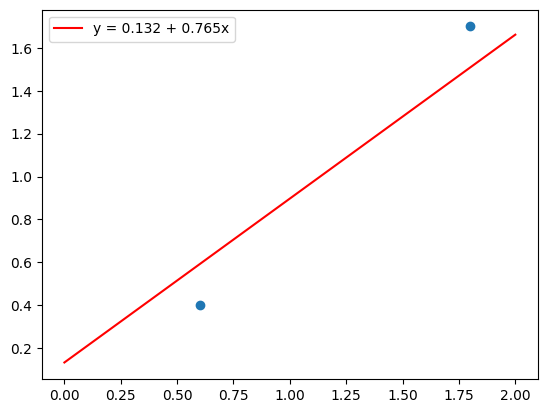

In [47]:
# Test
X = np.array([[0.6], [1.8]])
y = np.array([0.4, 1.7])
alpha = 0.3

plt.plot(X, y, 'o')

beta_hat = ridge_estimator(X, y, alpha)
print(f'y = {beta_hat[0]:.3f} + {beta_hat[1]:.3f}x')
xx = np.linspace(0, 2, 2)
yy = beta_hat[0] + beta_hat[1] * xx
plt.plot(xx, yy, 'r', label=f'y = {beta_hat[0]:.3f} + {beta_hat[1]:.3f}x')
plt.legend()
plt.show()